## Creating Image Dataset from Google Image

### Downloading the urls

Open ```https://images.google.com/``` and search the images. Open the browser's web console, and enter the following javascript command to download the urls in a csv file.

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [1]:
import os
import fastai as f
import fastai.vision as fv

In [7]:
!ls ../../../data/bikes

city_bikes.txt	folding_bikes.txt  mountain_bikes.txt  road_bikes.txt


In [16]:
files = os.listdir('../../../data/bikes')

In [21]:
for file in files:
    root_folder_path = '../../../data/bikes'
    file_path = f'{root_folder_path}/{file}'
    folder = file.replace('_bikes.txt', '')
    dest = f'{root_folder_path}/{folder}'
    fv.download_images(file_path, dest, max_pics=200)

Error https://www.wayscral.com/673-large_default/673-folding-bike-wayscral-foldy-20.jpg HTTPSConnectionPool(host='www.wayscral.com', port=443): Read timed out. (read timeout=4)
Error https://img.shop.com/Image/250000/250600/250683/products/1543311849__400x400__.jpg HTTPSConnectionPool(host='img.shop.com', port=443): Read timed out. (read timeout=4)


Error https://media.performancebike.com/images/performance/products/product-hi/31-9642-WHI-ANGLE.JPG?resize=415px:415px&output-quality=85 HTTPSConnectionPool(host='media.performancebike.com', port=443): Max retries exceeded with url: /images/performance/products/product-hi/31-9642-WHI-ANGLE.JPG?resize=415px:415px&output-quality=85 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa871962320>: Failed to establish a new connection: [Errno -2] Name or service not known',))


Error https://media.performancebike.com/images/performance/products/product-hi/31-8595-BLK-ANGLE.jpg?resize=415px:415px&output-quality=85 HTTPSConnectionPool(host='media.performancebike.com', port=443): Max retries exceeded with url: /images/performance/products/product-hi/31-8595-BLK-ANGLE.jpg?resize=415px:415px&output-quality=85 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa871961a58>: Failed to establish a new connection: [Errno -2] Name or service not known',))


Error https://media.performancebike.com/images/performance/products/product-hi/31-8504-CSL-ANGLE.jpg?resize=1500px:1500px&output-quality=100 HTTPSConnectionPool(host='media.performancebike.com', port=443): Max retries exceeded with url: /images/performance/products/product-hi/31-8504-CSL-ANGLE.jpg?resize=1500px:1500px&output-quality=100 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa8719633c8>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://www.pictoncycles.co.uk/images/Syssix2019durastd.jpg HTTPConnectionPool(host='www.pictoncycles.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fa870e7e9b0>, 'Connection to www.pictoncycles.co.uk timed out. (connect timeout=4)'))


### Create the list of classes

In [2]:
!ls ../../../data/bikes/

city		folding		   mountain	       road
city_bikes.txt	folding_bikes.txt  mountain_bikes.txt  road_bikes.txt


In [8]:
root_path = '../../../data/bikes'
classes = []
for item in os.listdir(root_path):
    if os.path.isdir(f'{root_path}/{item}'):
        classes.append(item)

In [9]:
classes

['city', 'road', 'mountain', 'folding']

### Verify the items

In [11]:
for bike in classes:
    print('---------------------------------------------------------')
    print(bike)
    fv.verify_images(f'{root_path}/{bike}', delete=True, max_size=500)

---------------------------------------------------------
city


---------------------------------------------------------
road


cannot identify image file <_io.BufferedReader name='../../../data/bikes/road/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/road/00000001.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/road/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/road/00000043.jpg'>
---------------------------------------------------------
mountain


cannot identify image file <_io.BufferedReader name='../../../data/bikes/mountain/00000059.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/mountain/00000042.jpg'>
cannot identify image file <_io.BufferedReader name='../../../data/bikes/mountain/00000031.jpg'>
---------------------------------------------------------
folding


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:1022: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


cannot identify image file <_io.BufferedReader name='../../../data/bikes/folding/00000085.jpg'>


### Create the data bunch and look at the data

In [27]:
data = fv.ImageDataBunch.from_folder(
    root_path,
    train='.',
    valid_pct=0.2,
    ds_tfms=fv.get_transforms(),
    size=224,
    bs=8
)

In [28]:
data.normalize(fv.imagenet_stats)

ImageDataBunch;

Train: LabelList (304 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
city,city,city,city,city
Path: ../../../data/bikes;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
folding,city,city,mountain,folding
Path: ../../../data/bikes;

Test: None

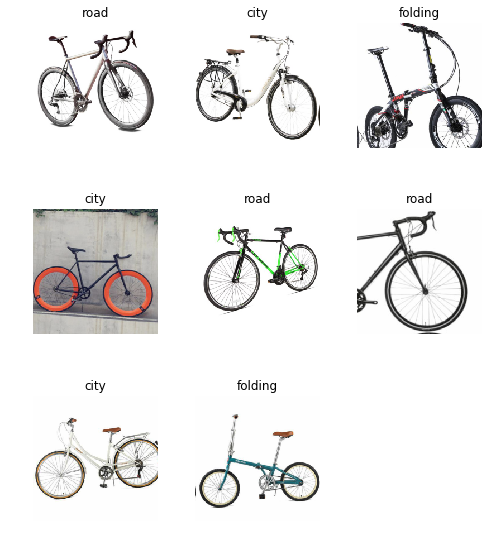

In [29]:
data.show_batch(rows=3, figsize=(7,8))

In [30]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['city', 'folding', 'mountain', 'road'], 4, 304, 75)

### Train

In [31]:
learn = fv.cnn_learner(data, fv.models.resnet34, metrics=f.metrics.error_rate)

In [32]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.216814,0.521902,0.213333,00:06
1,0.981982,0.419717,0.146667,00:06
2,0.841371,0.427804,0.160000,00:06
3,0.760875,0.399600,0.133333,00:04


In [33]:
learn.save('stage-1')

In [38]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (304 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
city,city,city,city,city
Path: ../../../data/bikes;

Valid: LabelList (75 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
folding,city,city,mountain,folding
Path: ../../../data/bikes;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [39]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


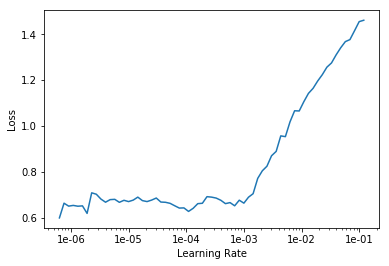

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.657849,0.359705,0.120000,00:04
1,0.551801,0.359564,0.106667,00:05


In [43]:
learn.save('stage-2')

### Interpretation

In [44]:
interp = fv.learner.ClassificationInterpretation.from_learner(learn)

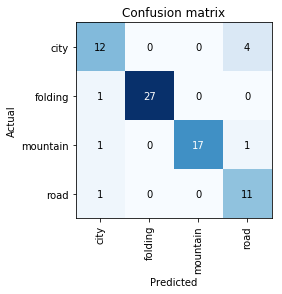

In [45]:
interp.plot_confusion_matrix()